
# **OpenDataProject - CODE1161** ⭐✨

## *`Clean Water Importance`* 🌏💧

### `Htay Hlaing Win - z5443603`
***

<style>
.reveal {
    width: 100%; /* Set the width of the entire presentation */
}
.reveal .slides {
    width: 100%; /* Set the width of the scrolling area */
}
</style>


Looking at our beautiful blue planet from space, water appears abundant, covering about 71% of the Earth's surface. However, there's a hidden truth that often goes unnoticed. While water might seem endless, the availability of freshwater, the life-sustaining resource we rely on for our survival, is incredibly limited.


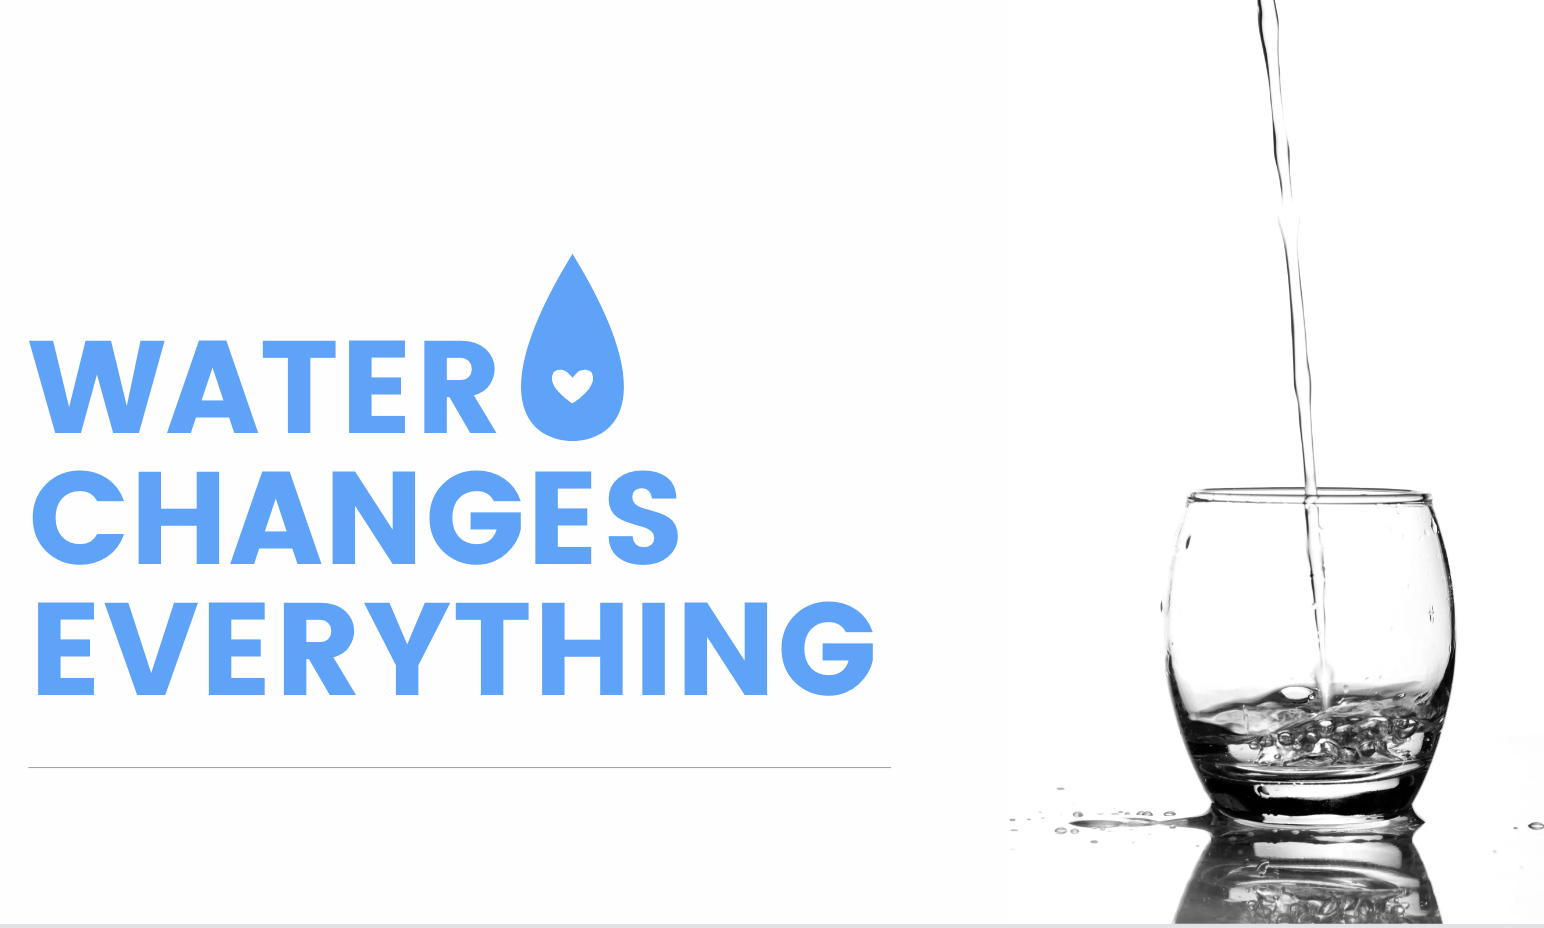

In [1]:
from IPython.display import Image
Image(filename="water_pic.png")

In [2]:
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import geopandas as gpd
import shapely
import fiona
import os
from datetime import datetime
%matplotlib inline
plt.rcParams["figure.figsize"] = (10, 5)
saved_style_state = matplotlib.rcParams.copy() #provide a style state to go back to


In [3]:
if os.path.isfile("water_distribution.csv"):
    filepath = "water_distribution.csv"
    print("loading from file")
else:
    filepath = "https://datatopics.worldbank.org/sdgatlas/data/goal06/goal06.water_distribution.csv"
    print("loading from the internet")

water_disribution_data = pd.read_csv(filepath)
print("OK")

loading from file
OK


In [4]:
water_disribution_data.head()
water_disribution_data.sample(5)


water_source  water_volume_km3  \
4                           Lakes|Saline             85400   
5   Ice caps, Glaciers, & Permanent Snow          24064000   
12                                Rivers              2120   
1                            Groundwater          23400000   
11                           Swamp Water             11470   

    pct_of_total_water  pct_of_freshwater  is_fresh  
4               0.0060                NaN     False  
5               1.7400             68.700      True  
12              0.0002              0.006      True  
1               1.6900                NaN     False  
11              0.0008              0.030      True


Out of all the water on our planet, only a mere 2.5 percent is freshwater. The remaining 97.5 percent is Non-freshwater , making it unsuitable for direct human consumption or crop irrigation.

Did you know that about 69 percent of all freshwater is actually trapped in glaciers? That means it's not readily available for use.
From the chart, Groundwater makes up the largest portion of the remaining freshwater. Surprisingly, it serves as the primary source of water supplies in many countries, even though it is hidden beneath the Earth's surface and can only be accessed through drilling.The solid state of ice caps, glaciers, and permanent snow makes them difficult to access for obtaining water. Thus, easily accessible surface freshwater accounts for less than 1% of the total.


## *`Freshwater is a limited resource`* 
****

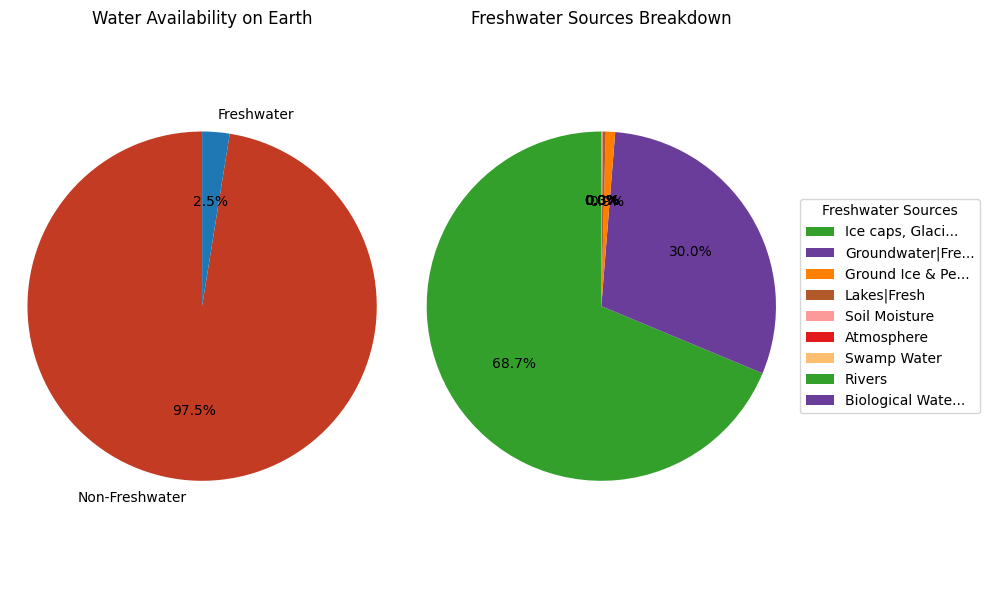

In [5]:
import pandas as pd
import matplotlib.pyplot as plt

data = pd.read_csv("water_distribution.csv")
# Categorize specific water sources as non-freshwater
non_freshwater_sources = ['Oceans, Seas, & Bays', 'Groundwater|Saline', 'Lakes|Saline']
data.loc[data['water_source'].isin(non_freshwater_sources), 'is_fresh'] = False

# Data for the pie chart
labels = ['Non-Freshwater', 'Freshwater']
# Calculate freshwater and non-freshwater percentages based on the data
freshwater_data = data[data['is_fresh']]
freshwater_percentage = freshwater_data['pct_of_total_water'].sum()
non_freshwater_percentage = 100 - freshwater_percentage
sizes = [non_freshwater_percentage, freshwater_percentage]
# Custom color palette for the pie chart with darker colours
colors = ['#C23B22', '#1F78B4', '#33A02C', '#6A3D9A', '#FF7F00',
          '#B15928', '#FB9A99', '#E31A1C', '#FDBF6F']
plt.figure(figsize=(10, 6))
# Water Distribution Chart
plt.subplot(1, 2, 1)
plt.pie(sizes, labels=labels, colors=colors[:2], autopct='%1.1f%%',
        startangle=90)
plt.title('Water Availability on Earth')
plt.axis('equal')
# Data for Freshwater sources breakdown Chart
freshwater_sources = freshwater_data['water_source'].tolist()
freshwater_percentages = freshwater_data['pct_of_total_water'].tolist()
plt.subplot(1, 2, 2)
plt.pie(freshwater_percentages, labels=None, colors=colors[2:], 
        autopct='%1.1f%%', startangle=90)
plt.title('Freshwater Sources Breakdown')
plt.axis('equal')
# Create a legend label outside for freshwater breakdown chart
legend_labels = [f'{source[:15]}...' if len(source) > 15 
                 else source for source in freshwater_sources]
plt.legend(legend_labels, title='Freshwater Sources', loc='center left', 
           bbox_to_anchor=(1, 0, 0.5, 1))
plt.tight_layout()
plt.show()

## *`Water Availability`* 🌊🚰
****

In [6]:
if os.path.isfile("Per_capita2.csv"):
    filepath = "Per_capita2.csv"
    print("loading from file")
else:
    filepath = "https://datatopics.worldbank.org/sdgatlas/data/goal06/goal06.per_capita2.csv"
    print("loading from the internet")

per_capital_data = pd.read_csv(filepath)
print("OK")

loading from file
OK


In [7]:
per_capital_data.head()
per_capital_data.sample(5)


iso3c  year     per_capita  projection      country  population
6488   NLD  1977    6550.100314       False  Netherlands  13856185.0
5908   MUS  1984    2730.518382       False    Mauritius   1012221.0
3462   GEO  2008   15287.297640       False      Georgia   3848449.0
6927   PAK  1965    4847.011296       False     Pakistan  51841626.0
6558   NZL  1964  126718.154800       False  New Zealand   2585400.0

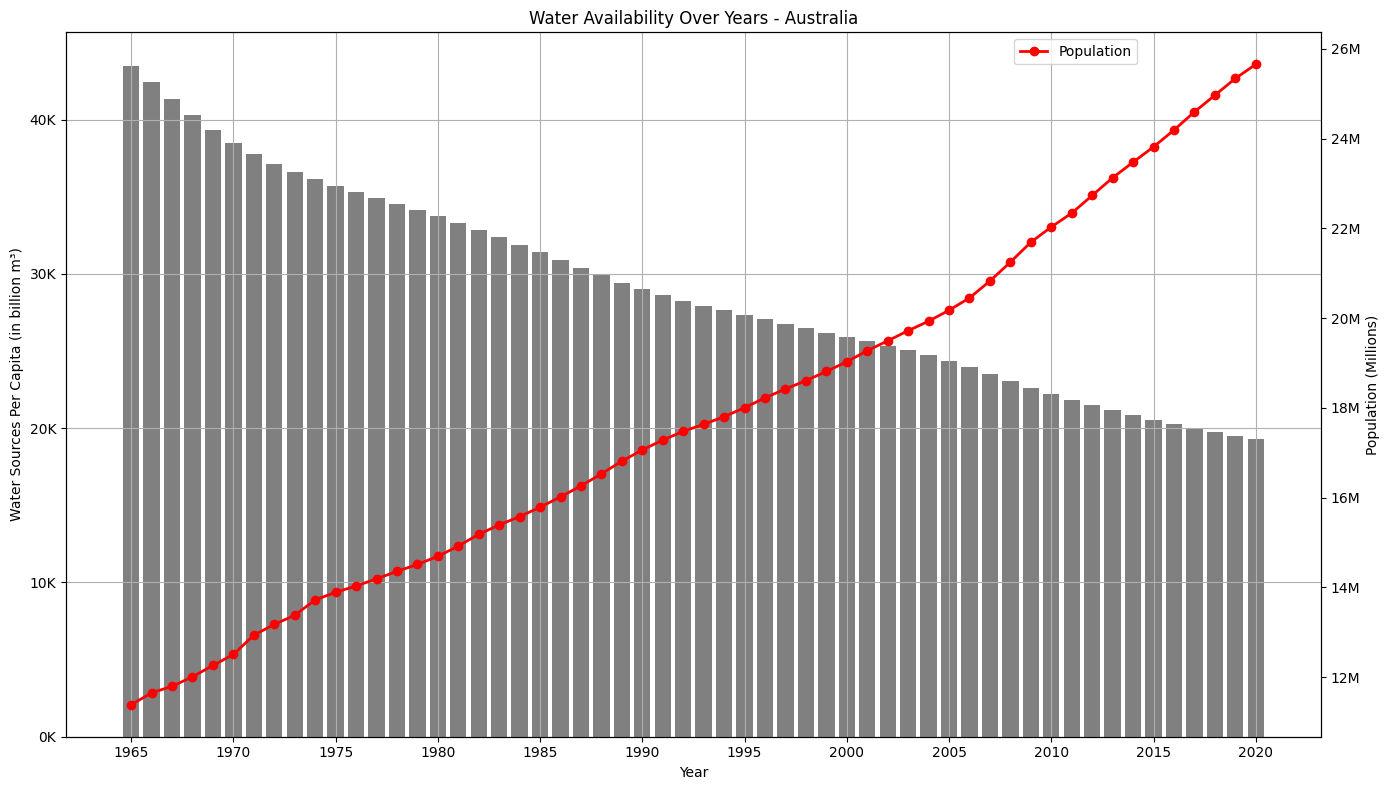

In [8]:
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.ticker import FuncFormatter, MultipleLocator

#format tick labels as thousands (K)
def thousands_formatter(x, pos):
    return f'{x / 1e3:.0f}K'

#format tick labels as millions
def millions_formatter(x, pos):
    return f'{x / 1e6:.0f}M'

data = pd.read_csv("Per_capita2.csv")
countries_to_plot = ['Australia']

# Create a figure and axis
for country in countries_to_plot:
    plt.figure(figsize=(14, 8))   
    # Filter data for the current country starting from 1965
    country_data = data[(data['country'] == country) & (data['year'] >= 1965)]    
    # Bar Chart
    bar = plt.bar(country_data['year'], country_data['per_capita'], color='grey', label='Per Capita')
    plt.xlabel('Year')
    plt.ylabel('Water Sources Per Capita (in billion m³)')
    plt.title(f'Water Availability Over Years - {country}')
    plt.grid(True)    
    # Customize y-axis tick labels
    plt.gca().yaxis.set_major_formatter(FuncFormatter(thousands_formatter)) 

    # Line Chart 
    ax2 = plt.gca().twinx()
    line = ax2.plot(country_data['year'], country_data['population'], marker='o', color='red', linestyle='-', linewidth=2, markersize=6, label='Population')
    ax2.set_ylabel('Population (Millions)')

    # Set y-axis tick label formatter for the line chart
    ax2.yaxis.set_major_formatter(FuncFormatter(millions_formatter))  
    
    # Set x-axis tick interval to every 5 years
    ax2.xaxis.set_major_locator(MultipleLocator(base=5))

    # Get handles and labels for the line chart legend only
    line_handles, line_labels = ax2.get_legend_handles_labels()

    # Show legend for the line chart
    plt.legend(handles=line_handles, labels=line_labels, loc='upper left', bbox_to_anchor=(0.75, 1.0))

    plt.tight_layout()
    plt.show()


Next I will showcase the insightful data about water availabiliy in Aus from 1965. In this graph, I have combined bar chart and line chart together. customized the y-axis tick labels to be more readable, using thousands formatting on the left and million formatting on the right. Each bar represents a year, and the height indicates water sources available to each person in a country in billion cubic meter. By looking at the chart together, we can see the trends in water availability and population growth in aus over time. The bar chart allows us to visualize changes in water sources per capita, while the line chart offers insights into shifts in population dynamics.

In [9]:
import pandas as pd

# Load the data from the CSV file
data = pd.read_csv("Per_capita2.csv")

# Filter data for Congo and Latvia in specific years
congo_1964 = data[(data['country'] == 'Congo, Rep.') & (data['year'] == 1964)]
congo_2020 = data[(data['country'] == 'Congo, Rep.') & (data['year'] == 2020)]
latvia_1995 = data[(data['country'] == 'Latvia') & (data['year'] == 1995)]
latvia_2020 = data[(data['country'] == 'Latvia') & (data['year'] == 2020)]

# Print the per capita values for Congo and Latvia in specific years
print("Per Capita for Congo in 1964:", congo_1964['per_capita'].values[0])
print("Per Capita for Congo in 2020:", congo_2020['per_capita'].values[0])
print("Per Capita for Latvia in 1995:", latvia_1995['per_capita'].values[0])
print("Per Capita for Latvia in 2020:", latvia_2020['per_capita'].values[0])

Per Capita for Congo in 1964: 739324.2292
Per Capita for Congo in 2020: 150776.8906
Per Capita for Latvia in 1995: 13973.0
Per Capita for Latvia in 2020: 18524.03618


In [10]:
import pandas as pd
data = pd.read_csv("Per_capita2.csv")
per_capita_difference = data.groupby('country').apply(lambda x: x['per_capita'].iloc[-1] - x['per_capita'].iloc[0])
sorted_countries = per_capita_difference.sort_values(ascending=False)
print("Countries with the biggest decrease in per capita water resources:")
print(sorted_countries.head())


Countries with the biggest decrease in per capita water resources:
country
Congo, Rep.         424206.10940
Iceland             399686.47630
Bhutan              283583.85120
Solomon Islands     271623.84635
Papua New Guinea    239530.79763
dtype: float64


In [11]:
import pandas as pd
data = pd.read_csv("Per_capita2.csv")
per_capita_difference = data.groupby('country').apply(lambda x: x['per_capita'].iloc[-1] - x['per_capita'].iloc[0])
sorted_countries = per_capita_difference.sort_values()
countries_with_biggest_increase = sorted_countries.head(3).index
print("Countries with the biggest increase in per capita water resources:")
print(countries_with_biggest_increase)


Countries with the biggest increase in per capita water resources:
Index(['Latvia', 'Georgia', 'Croatia'], dtype='object', name='country')


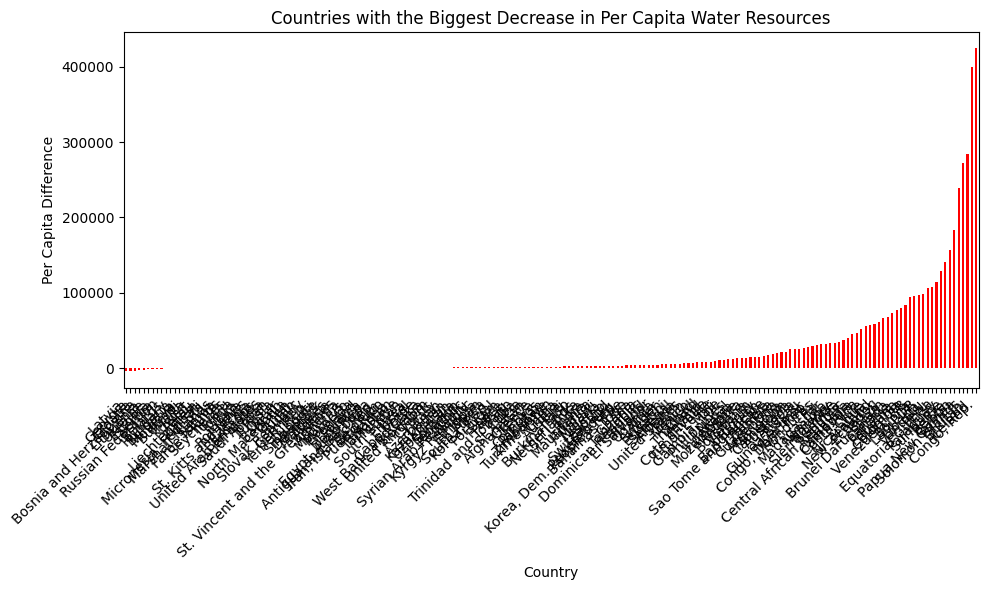

In [12]:
import pandas as pd
import matplotlib.pyplot as plt

# Load the data from the CSV file
data = pd.read_csv("Per_capita2.csv")

# Calculate the per capita difference for each country
per_capita_difference = (data.groupby('country')['per_capita'].last()
                         - data.groupby('country')['per_capita'].first())

# Sort the countries based on the per capita difference
sorted_countries = per_capita_difference.sort_values()

# Plot the data
plt.figure(figsize=(10, 6))
sorted_countries.plot(kind='bar', color='red')
plt.xlabel('Country')
plt.ylabel('Per Capita Difference')
plt.title('Countries with the Biggest Decrease in Per Capita Water Resources')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()


What about the world. Most of the countries are not doing great in maintaining available water sources over time. 

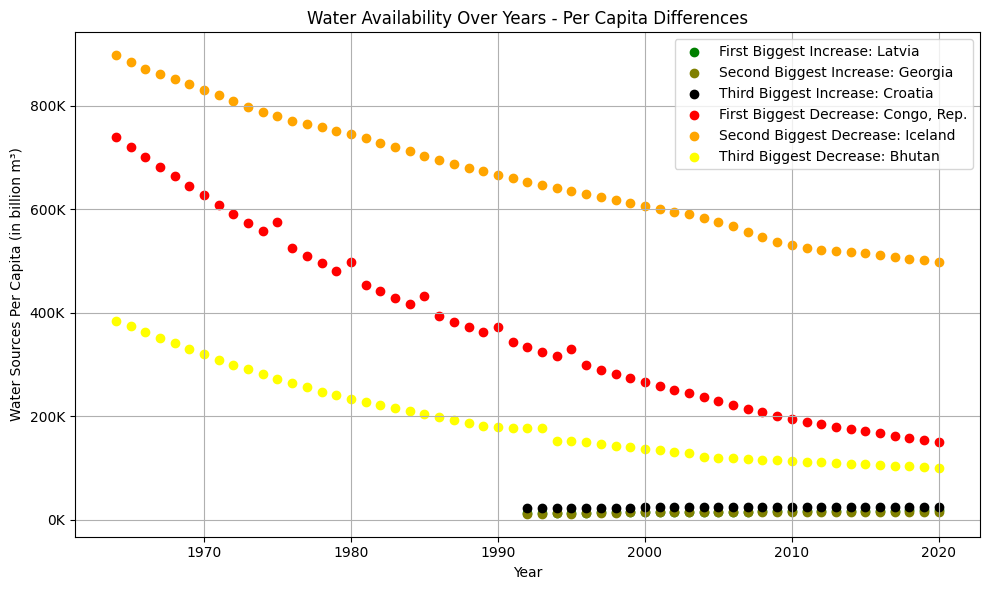

In [13]:
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.ticker import FuncFormatter
data = pd.read_csv("Per_capita2.csv")

per_capita_difference = data.groupby('country').apply(lambda x: x['per_capita'].iloc[-1] - x['per_capita'].iloc[0])
label_prefixes = ['First', 'Second', 'Third']

top_decrease_countries = per_capita_difference.sort_values().head(3).index
smallest_decrease_countries = per_capita_difference.sort_values(ascending=False).head(3).index

# Create a function to format tick labels as thousands (K)
def thousands_formatter(x, pos):
    return f'{x / 1e3:.0f}K'
plt.figure(figsize=(10, 6))

top_increase_colors = ['green', 'olive', 'black']
top_decrease_colors = ['red', 'orange', 'yellow']

for i, country in enumerate(top_decrease_countries):
    country_data = data[data['country'] == country]
    plt.scatter(country_data['year'], country_data['per_capita'], color=top_increase_colors[i], label=f'{label_prefixes[i]} Biggest Increase: {country}')

for i, country in enumerate(smallest_decrease_countries):
    country_data = data[data['country'] == country]
    plt.scatter(country_data['year'], country_data['per_capita'], color=top_decrease_colors[i], 
                label=f'{label_prefixes[i]} Biggest Decrease: {country}')

plt.xlabel('Year')
plt.ylabel('Water Sources Per Capita (in billion m³)')
plt.title('Water Availability Over Years - Per Capita Differences')

# Apply the custom thousands formatter to y-axis
plt.gca().yaxis.set_major_formatter(FuncFormatter(thousands_formatter))
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


In [14]:
import matplotlib.pyplot as plt
import pandas as pd
import os
import seaborn as sns

if os.path.isfile("water_withdrawal_by_sector.csv"):
    filepath = "water_withdrawal_by_sector.csv"
    print("Loading from file")
else:
    filepath = "https://datatopics.worldbank.org/sdgatlas/data/goal06/goal06.water_withdrawal_by_sector.csv"
    print("Loading from the internet")

water_usage_data = pd.read_csv(filepath)
water_usage_data.head()

Loading from file


region                 region_name  agriculture   domestic   industry  \
0    EAS         East Asia & Pacific    72.821340  12.019122  15.165872   
1    ECS       Europe & Central Asia    52.899735  16.546461  30.553804   
2    LCN   Latin America & Caribbean    71.771851  17.601265  10.626895   
3    MEA  Middle East & North Africa    85.425634  10.244860   4.329506   
4    NAC               North America    37.259157  13.186162  49.554681   

         total  
0  1243.388300  
1   497.141800  
2   332.351244  
3   274.628000  
4   480.126112

## *`Water Withdrawls`* 🌍💧 
****

Loading from file


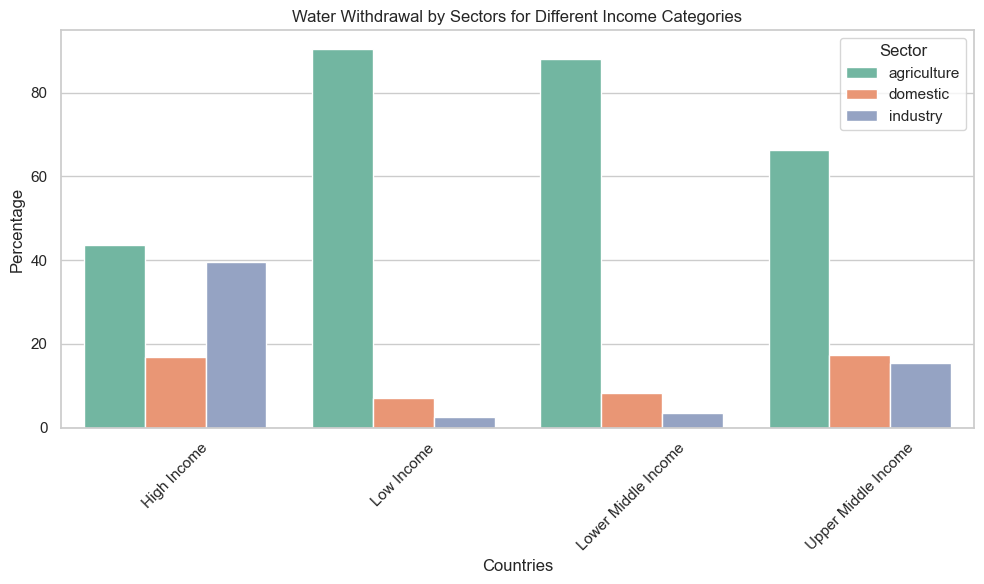

In [15]:
import matplotlib.pyplot as plt
import pandas as pd
import os
import seaborn as sns

if os.path.isfile("water_withdrawal_by_sector.csv"):
    filepath = "water_withdrawal_by_sector.csv"
    print("Loading from file")
else:
    filepath = "https://datatopics.worldbank.org/sdgatlas/data/goal06/goal06.water_withdrawal_by_sector.csv"
    print("Loading from the internet")

water_usage_data = pd.read_csv(filepath)

income_categories = ["HIC", "LIC", "LMC", "UMC"]
sectors = ['agriculture', 'domestic', 'industry']

# List of region names to be removed from x-axis
regions_to_remove = ['East Asia & Pacific', 'Europe & Central Asia', 'Latin America & Caribbean',
                     'Middle East & North Africa', 'North America', 'South Asia', 
                     'Sub-Saharan Africa', 'World']

# Filter out specific regions from the data
filtered_data = water_usage_data[~water_usage_data['region_name'].isin(regions_to_remove)]

# Melt the data to create a suitable format for Seaborn
melted_data = pd.melt(filtered_data, id_vars=['region_name', 'region'], value_vars=sectors, var_name='sector')

# Set the style
sns.set(style="whitegrid")

# Create a grouped bar chart
plt.figure(figsize=(10, 6))
sns.barplot(data=melted_data, x='region_name', y='value', hue='sector', palette='Set2')

plt.title('Water Withdrawal by Sectors for Different Income Categories')
plt.ylabel('Percentage')
plt.xlabel('Countries')
plt.xticks(rotation=45)

plt.legend(title='Sector')
plt.tight_layout()
plt.show()


This graph visually captures how countries of varying income categories allocate their water resources across sectors like agriculture, domestic use, and industry. It turns out that the agriculture sector is the real heavyweight when it comes to water usage, no matter the income level. Now, in countries with higher incomes, people tend to use a lot of water for their homes and industries. On the flip side, low-income countries don't use as much water for domestic and industrial purposes. Instead, they use most water for agriculture. And the interesting thing is low income and lower middle income countries have similar usage of water. However, this similarity extends to high-income and higher middle-income nations as well, suggesting a surprising commonality in water resource management strategies across different income level

Loading from file


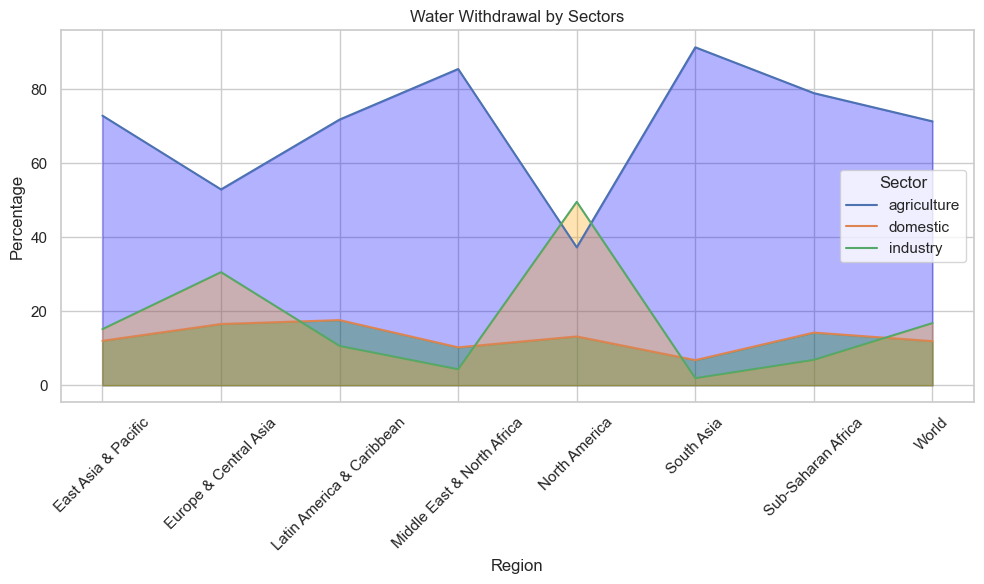

In [16]:
import matplotlib.pyplot as plt
import pandas as pd
import os
import seaborn as sns

if os.path.isfile("water_withdrawal_by_sector.csv"):
    filepath = "water_withdrawal_by_sector.csv"
    print("Loading from file")
else:
    filepath = "https://datatopics.worldbank.org/sdgatlas/data/goal06/goal06.water_withdrawal_by_sector.csv"
    print("Loading from the internet")

percent_data = pd.read_csv(filepath)

# Exclude the rows
filtered_data = percent_data[~percent_data['region'].isin(['HIC', 'LIC','LMC', 'UMC'])]

# Set the style
sns.set(style="whitegrid")

# Create a stacked area chart for different sectors over time
sectors = ['agriculture', 'domestic', 'industry']
plt.figure(figsize=(10, 6))
sns.lineplot(data=filtered_data, x='region_name', y=sectors[0], label=sectors[0])
sns.lineplot(data=filtered_data, x='region_name', y=sectors[1], label=sectors[1])
sns.lineplot(data=filtered_data, x='region_name', y=sectors[2], label=sectors[2])

plt.fill_between(filtered_data['region_name'], filtered_data[sectors[0]], color='blue', alpha=0.3)
plt.fill_between(filtered_data['region_name'], filtered_data[sectors[1]], color='green', alpha=0.3)
plt.fill_between(filtered_data['region_name'], filtered_data[sectors[2]], color='orange', alpha=0.3)

plt.title('Water Withdrawal by Sectors')
plt.ylabel('Percentage')
plt.xlabel('Region')
plt.xticks(rotation=45)
plt.legend(title='Sector')

plt.tight_layout()
plt.show()


## *`Water Stress`* ⚠️🌎
****

In [17]:
import matplotlib.pyplot as plt
import pandas as pd
import os
import seaborn as sns

if os.path.isfile("country_level_water_stress.csv"):
    filepath = "country_level_water_stress.csv"
    print("Loading from file")
else:
    filepath = "https://datatopics.worldbank.org/sdgatlas/data/goal06/goal06.country_level_water_stress.csv"
    print("Loading from the internet")

water_stress_data = pd.read_csv(filepath)
water_stress_data.head()

Loading from file


iso              country                     variable  water_stress  \
0  AFG          Afghanistan  SDG 6.4.2. Water Stress (%)     54.757019   
1  ALB              Albania  SDG 6.4.2. Water Stress (%)      4.723558   
2  DZA              Algeria  SDG 6.4.2. Water Stress (%)    137.920360   
3  AGO               Angola  SDG 6.4.2. Water Stress (%)      1.871883   
4  ATG  Antigua and Barbuda  SDG 6.4.2. Water Stress (%)      8.461538   

         source country_code  
0  FAO Aquastat          AFG  
1  FAO Aquastat          ALB  
2  FAO Aquastat          DZA  
3  FAO Aquastat          AGO  
4  FAO Aquastat          ATG

The water stress is calculated by dividing the total freshwater withdrawals by the available renewable freshwater.As a country's water usage approaches the 100 percent,he pressure on its water resources intensifies. In some cases, the value of 100 percent can even be exceeded. This happens when a country consumes water resources that are non-renewable. 
While low water stress indicates sustainable usage, it is important to note that this is not necessarily a positive outcome:. It can sometimes highlight a nation's struggle to effectively govern its water resources for the benefit of its population. In some low-income countries, water stress levels are very low, but access levels are also low

In [18]:
import geopandas as gpd

# Load the shapefile using GeoPandas
shapefile_path = 'ne_110m_admin_0_countries/ne_110m_admin_0_countries.shp'
gdf = gpd.read_file(shapefile_path)

# Print the column names of the attribute table
print(gdf.columns)


Index(['featurecla', 'scalerank', 'LABELRANK', 'SOVEREIGNT', 'SOV_A3',
       'ADM0_DIF', 'LEVEL', 'TYPE', 'TLC', 'ADMIN',
       ...
       'FCLASS_TR', 'FCLASS_ID', 'FCLASS_PL', 'FCLASS_GR', 'FCLASS_IT',
       'FCLASS_NL', 'FCLASS_SE', 'FCLASS_BD', 'FCLASS_UA', 'geometry'],
      dtype='object', length=169)


In [19]:
import geopandas as gpd
import plotly.express as px
import pandas as pd

water_stress_data = pd.read_csv('country_level_water_stress.csv')
shapefile_path = 'ne_110m_admin_0_countries/ne_110m_admin_0_countries.shp'
world = gpd.read_file(shapefile_path)
# Choose the correct ISO country code column name
correct_iso_column_name = 'ADM0_A3'

# Merge shapefile with water stress data based on the correct ISO column name
merged_data = world.merge(water_stress_data, left_on=correct_iso_column_name, right_on='iso', how='left')

# Create an interactive map with hover effect using plotly express
fig = px.choropleth(merged_data,
                    geojson=merged_data.geometry,
                    locations=merged_data.index,
                    color='water_stress',
                    color_continuous_scale='OrRd',
                    hover_name='ADMIN',  # Include country names in hover
                    hover_data={'water_stress': ':.2f'},
                    title='Water Stress in Countries',
                    labels={'water_stress': 'Water Stress (%)'},
                    color_continuous_midpoint=100,  # Set midpoint for color scale
                    range_color=(0, 100))  # Set range of colors
fig.update_geos(fitbounds="locations", visible=False)
fig.update_layout(height=600)
fig.show()


If we focus on the Middle East and North Africa region, you'll notice that countries there are dealing with critical or high water stress. Why? Well, it's because water resources are pretty scarce in that area.
The population of these countries has nearly quadrupled over the past 50 years and is projected to keep increasing. The growing demand for water puts pressure on the Nile River Basin, where water flows are already fully used to meet various domestic, agricultural and industrial demands.


In [20]:
# Find countries with the highest water stress values
highest_water_stress = merged_data.nlargest(10, 'water_stress')

# Print the list of countries with the highest water stress values
print("Countries with the highest water stress values:")
for index, row in highest_water_stress.iterrows():
    print(row['ADMIN'], "-", row['water_stress'])


Countries with the highest water stress values:
Kuwait - 3850.5
United Arab Emirates - 1587.33333
Saudi Arabia - 974.166667
Libya - 817.142857
Qatar - 431.034483
Yemen - 169.761905
Uzbekistan - 168.924577
Egypt - 141.165756
Algeria - 137.92036
Turkmenistan - 135.213807


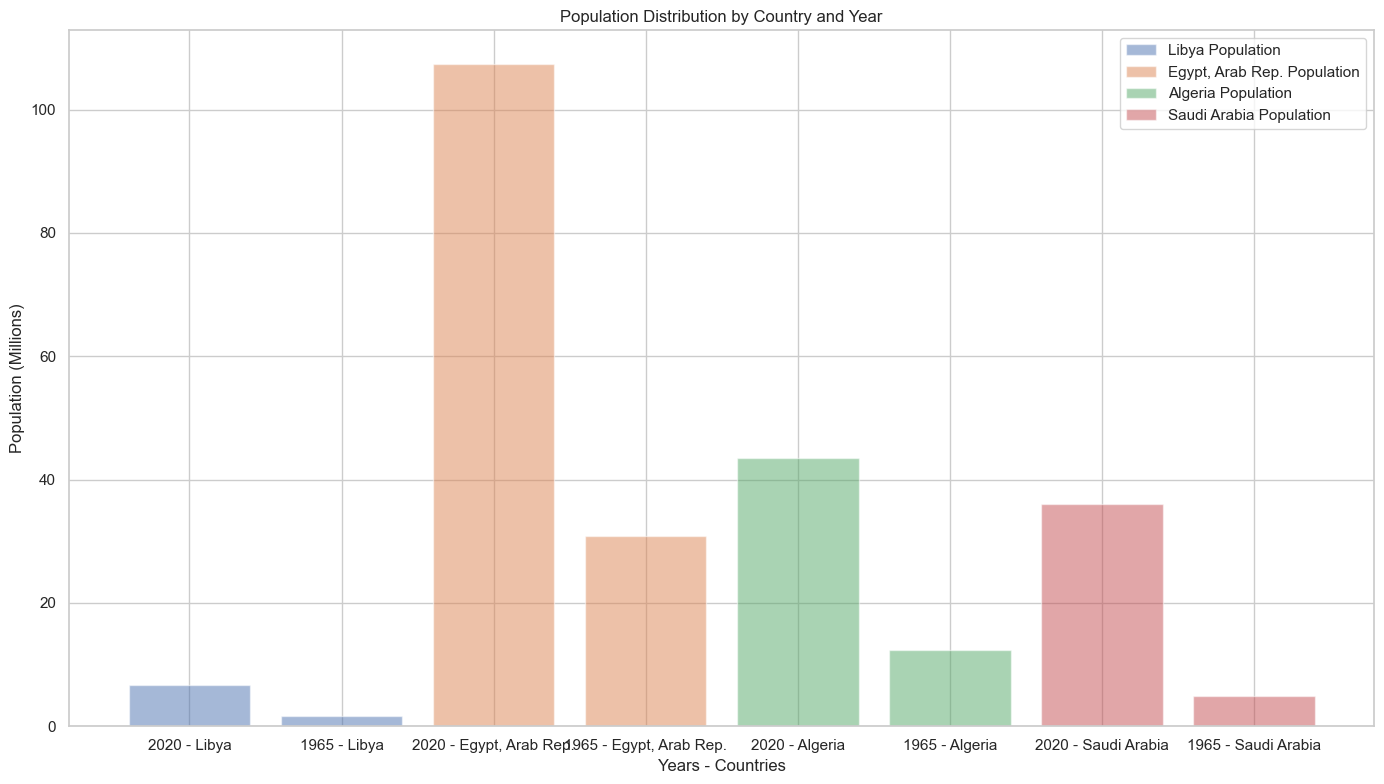

In [21]:
import pandas as pd
import matplotlib.pyplot as plt

data = pd.read_csv("Per_capita2.csv")
countries_to_plot = ['Libya', 'Egypt, Arab Rep.', 'Algeria', 'Saudi Arabia']  # Change to the desired countries

plt.figure(figsize=(14, 8))

# Create a histogram for each country's population
for country in countries_to_plot:
    # Filter data for the current country for years 1965 and 2020
    country_data = data[(data['country'] == country) & (data['year'].isin([1965, 2020]))]
    
    # Create a list of labels with years and countries
    labels = [f'{year} - {country}' for year in country_data['year']]
    
    # Vertical bar chart (swapping y and x axes)
    plt.bar(labels, country_data['population'] / 1e6, alpha=0.5, label=f'{country} Population')

# Customize the plot
plt.xlabel('Years - Countries')
plt.ylabel('Population (Millions)')
plt.title('Population Distribution by Country and Year')
plt.grid(True)
plt.legend()

plt.tight_layout()
plt.show()


In [22]:
for country in countries_to_plot:
    country_data = data[(data['country'] == country) & (data['year'] >= 1965)]
    print(country_data)
    # Rest of the code...


     iso3c  year  per_capita  projection country  population
5219   LBY  2020  101.873127       False   Libya   6653942.0
5220   LBY  2019  103.283653       False   Libya   6569088.0
5221   LBY  2018  104.813029       False   Libya   6477793.0
5222   LBY  2017  106.371275       False   Libya   6378261.0
5223   LBY  2016  107.822325       False   Libya   6282196.0
5224   LBY  2015  109.062893       False   Libya   6192235.0
5225   LBY  2014  110.027653       False   Libya   6097764.0
5226   LBY  2013  110.753185       False   Libya   5985221.0
5227   LBY  2012  111.363039       False   Libya   5869870.0
5228   LBY  2011  112.045912       False   Libya   6188132.0
5229   LBY  2010  112.945799       False   Libya   6491988.0
5230   LBY  2009  114.118328       False   Libya   6360191.0
5231   LBY  2008  115.535421       False   Libya   6228370.0
5232   LBY  2007  117.158988       False   Libya   6097177.0
5233   LBY  2006  118.908650       False   Libya   5973369.0
5234   LBY  2005  120.71

## *`Looking Forward`* ↗️🔱
****

Water is a precious resource. Amid pressures from human activities, and uncertainties linked to climate change, robust water management will be critical to the sustainable use of freshwater resources. This is especially important when considering the interdependencies that exist between water, food production, energy, ecosystems, and economic activities. Thus, lets take the first step towards a water-efficient future by integrating easy water-saving habits into our daily lives. Thank you. 💧🌿
